# Stroke Prediction Dataset

Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

---

## Leitura dos Dados

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
data = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


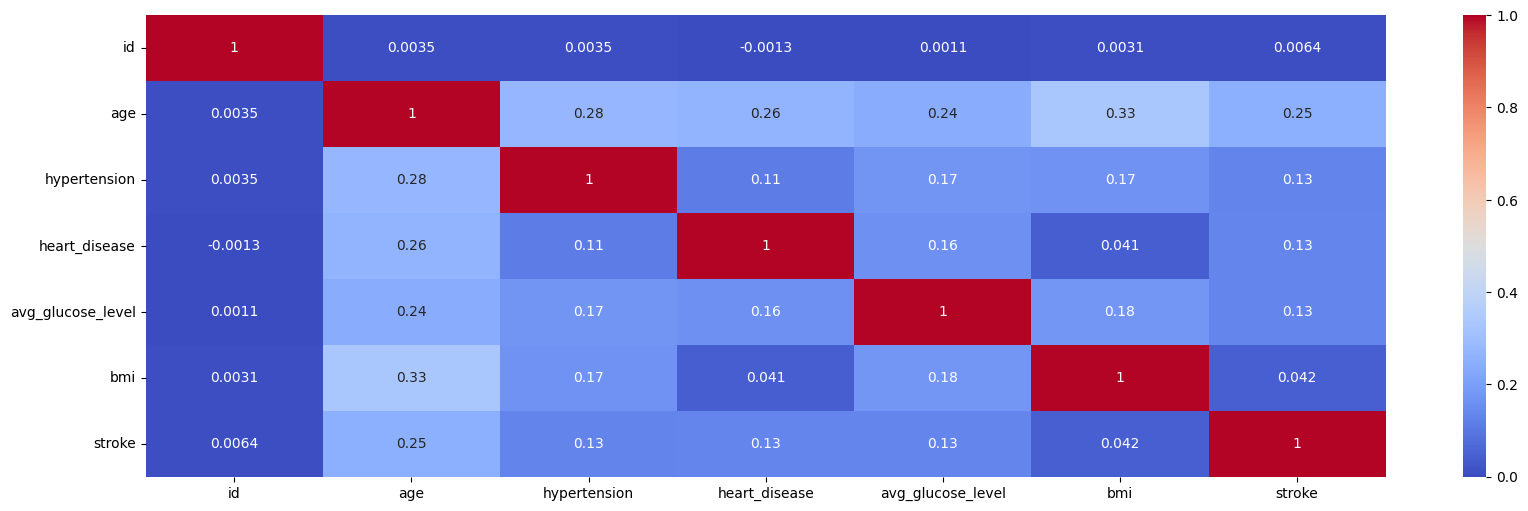

In [51]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Análise Exploratória dos Dados

In [52]:
data.shape

(5110, 12)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<Axes: xlabel='smoking_status', ylabel='count'>

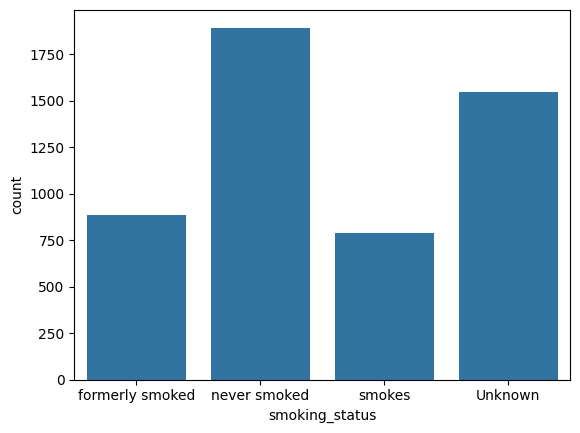

In [54]:
sns.countplot(data=data, x='smoking_status')

Colunas a plotar: ['age', 'avg_glucose_level', 'bmi']


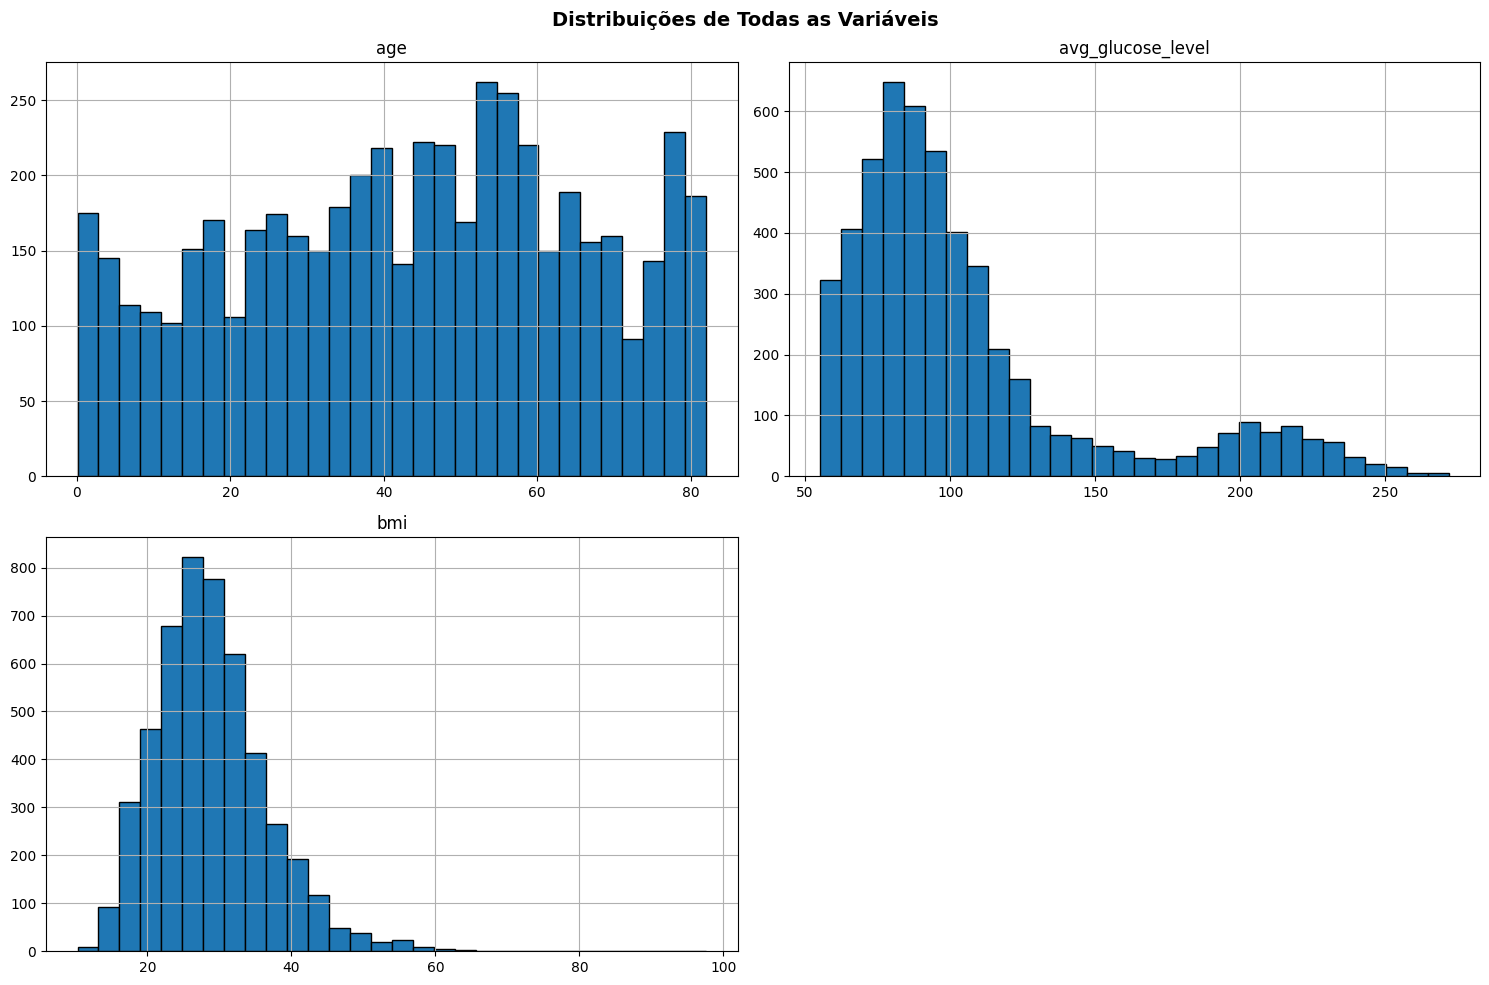

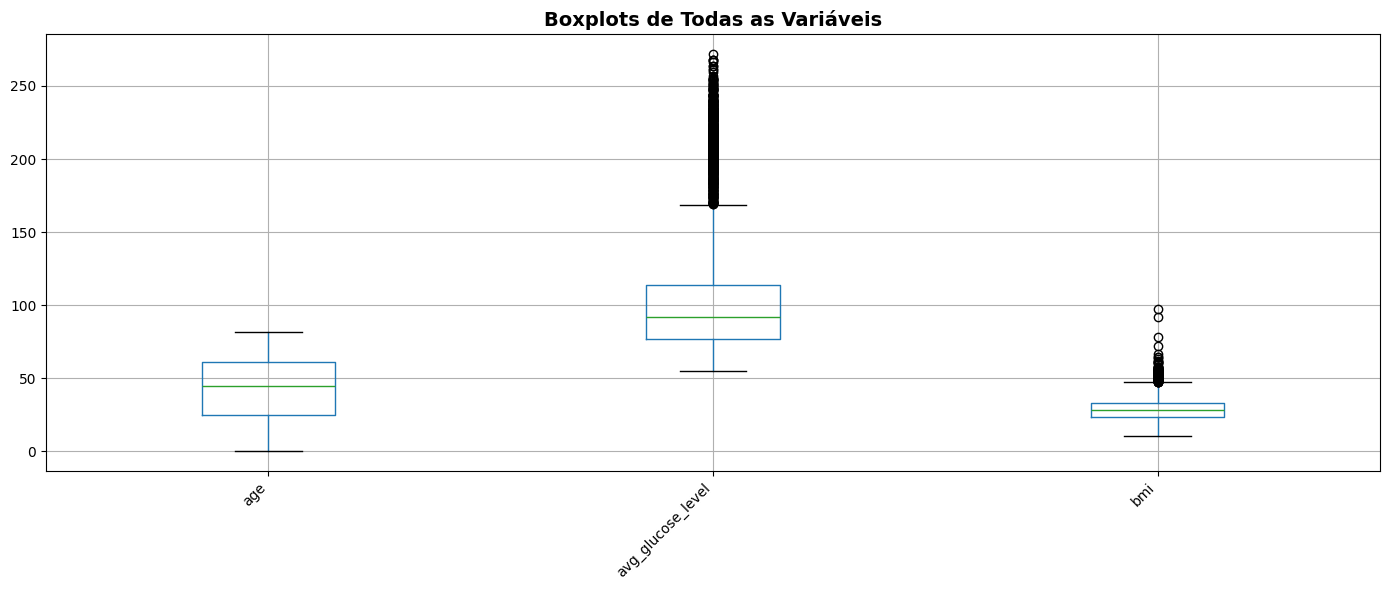

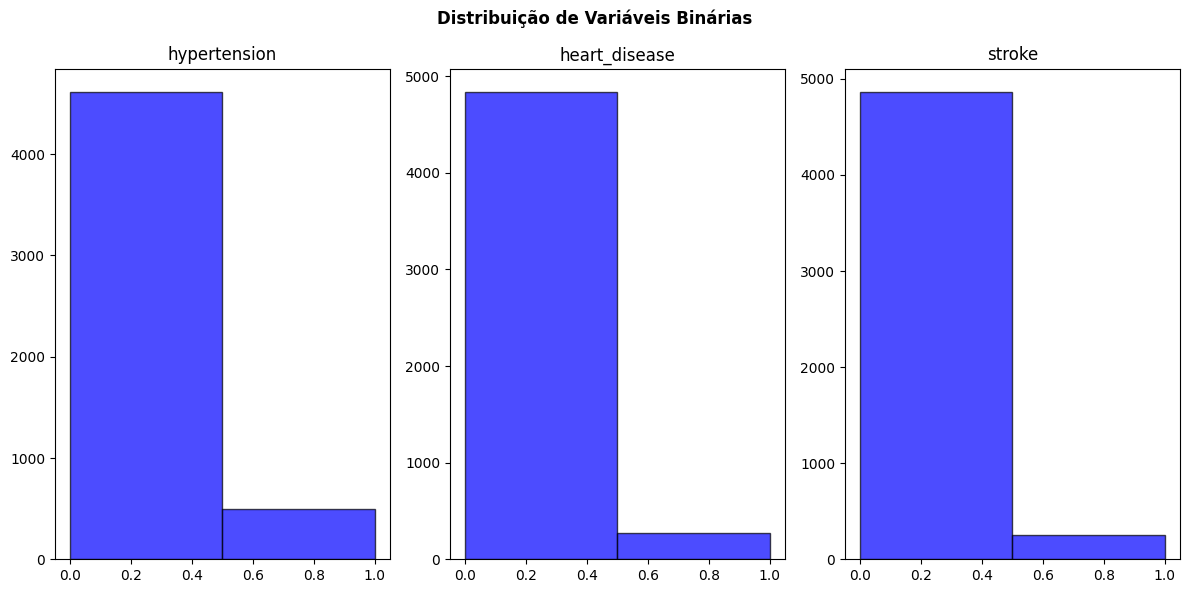

In [55]:
# Colunas interessantes (remove ID e colunas binárias)
colunas_num = data.select_dtypes(include=['number']).columns
colunas_plot = [col for col in colunas_num if col.lower() not in ['id', 'hypertension', 'heart_disease', 'stroke']]
# colunas_plot = [col for col in colunas_num if col.lower() != 'id']

print(f"Colunas a plotar: {colunas_plot}")

# ===== HISTOGRAMAS =====
data[colunas_plot].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Distribuições de Todas as Variáveis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ===== BOXPLOTS =====
fig, ax = plt.subplots(figsize=(14, 6))
data[colunas_plot].boxplot(ax=ax)
plt.title('Boxplots de Todas as Variáveis', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ===== COUNTPLOT =====
colunas_binarias = ['hypertension', 'heart_disease', 'stroke']
data[colunas_binarias].hist(figsize=(12, 6),
                            bins=2,
                            edgecolor='black',
                            color='blue',
                            grid=False,
                            layout=(1, 3),
                            sharex=False,
                            sharey=False,
                            alpha=0.7               # Transparência
                            )

plt.suptitle('Distribuição de Variáveis Binárias', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

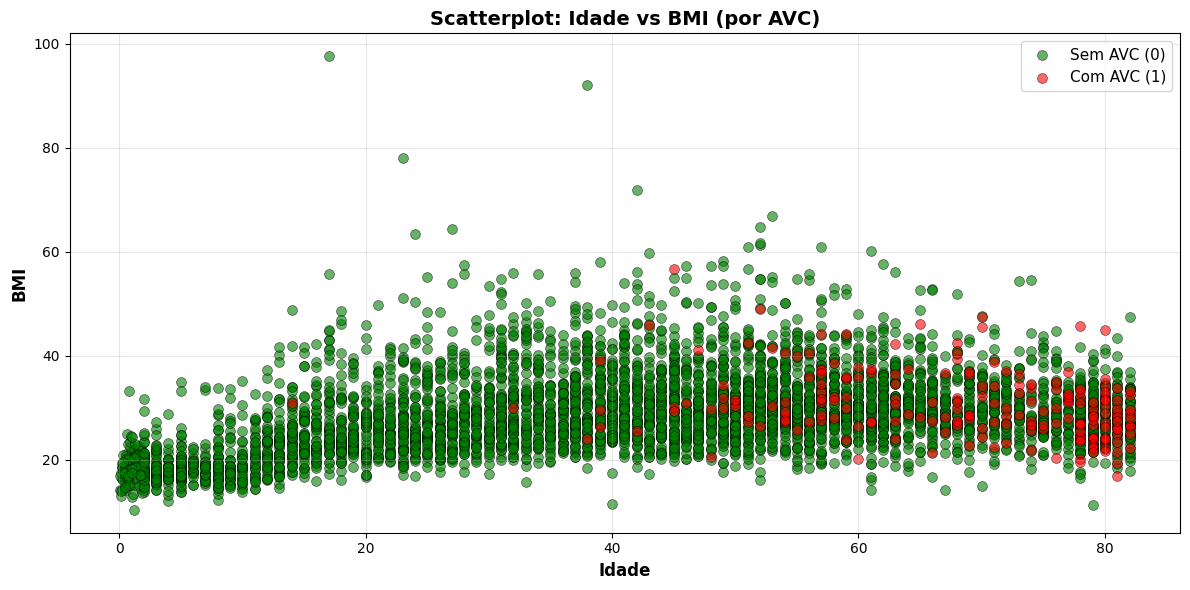

In [56]:
### Scatterplot: Idade vs BMI (por AVC)

# Remover NaN
dados_limpos = data[['age', 'bmi', 'stroke']].dropna()

fig, ax = plt.subplots(figsize=(12, 6))

# Separar por stroke
sem_avc = dados_limpos[dados_limpos['stroke'] == 0]
com_avc = dados_limpos[dados_limpos['stroke'] == 1]

# com avc
ax.scatter(sem_avc['age'], sem_avc['bmi'], 
          s=50, alpha=0.6, color='green', label='Sem AVC (0)', 
          edgecolors='black', linewidth=0.5)
# sem avc
ax.scatter(com_avc['age'], com_avc['bmi'], 
          s=50, alpha=0.6, color='red', label='Com AVC (1)', 
          edgecolors='black', linewidth=0.5)

ax.set_xlabel('Idade', fontsize=12, fontweight='bold')
ax.set_ylabel('BMI', fontsize=12, fontweight='bold')
ax.set_title('Scatterplot: Idade vs BMI (por AVC)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

O gráfico acima plota o cruzamento da idade com o bmi (IMC), onde os pontos verdes indicam os casos de não AVC e os pontos vermelhos indicam os casos de AVC. Podemos inferir que, neste dataset, os casos de AVC aumentam conforme a idade e conforme o bmi.

No caso de idade avançada, o AVC tem uma frequência maior.

In [57]:
px.histogram(data, x='ever_married', text_auto=True, color='stroke', barmode='group', width=500, height=400, title='ever_married')

In [58]:
px.histogram(data, x='work_type', text_auto=True, color='stroke', barmode='group', width=500, height=400, title='work_type')

In [59]:
px.histogram(data, x='smoking_status', text_auto=True, color='stroke', barmode='group', width=500, height=400, title='smoking_status')

In [60]:
px.box(data, x='age', color='stroke', title='stroke')

In [61]:
px.histogram(data, x='gender', text_auto=True, color='stroke', barmode='group', width=500, height=400, title='gender')

como só tem um registro com "Other", para cálculos envolvendo gênero, é melhor excluir esta coluna.

A proporção de homem que sofre AVC é maior que a de mulher.

In [62]:
px.box(data, x='avg_glucose_level', color='stroke', title='avg_glucose_level')

In [63]:
px.box(data, x='bmi', color='stroke', title='bmi')

In [64]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [65]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [66]:
data['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [67]:
data.query("stroke == 1")['Residence_type'].value_counts()

Residence_type
Urban    135
Rural    114
Name: count, dtype: int64

---

#### Analisando os registros que tiveram AVC

Separando um dataset somente com registros que sofreram AVC:

In [68]:
df_stroke = data[data.stroke == 1]

Analisando o [bmi]:

In [69]:
df_stroke['bmi'].mean().round(1)

np.float64(30.5)

In [70]:
df_stroke['bmi'].median().round(1)

np.float64(29.7)

In [71]:
print(f'stroke bmi: {min(df_stroke['bmi'])} ~ {max(df_stroke['bmi'])}')

stroke bmi: 16.9 ~ 56.6


In [72]:
print(f"Das {data[data['age'] < 18].shape[0]} crianças do dataset, apenas {df_stroke[df_stroke['age'] < 18].shape[0]} sofreram o AVC")

Das 856 crianças do dataset, apenas 2 sofreram o AVC


In [73]:
(df_stroke['work_type'].value_counts(normalize=True)*100)\
                        .round(1)\
                        .astype(str) + '%'

work_type
Private          59.8%
Self-employed    26.1%
Govt_job         13.3%
children          0.8%
Name: proportion, dtype: object

Dos que tiveram AVC, as crianças ocupam uma porcentagem insignificante. Em compensação, quem trabalha em empresa privada tem a maior porcentagem.

In [74]:
df_overweight = df_stroke.bmi.apply(lambda x: 0 if x < 25.0 else 1)
df_overweight.value_counts()

bmi
1    213
0     36
Name: count, dtype: int64

In [75]:
(df_overweight.value_counts(normalize=True)*100)\
        .round(1)\
        .astype(str) + '%'

bmi
1    85.5%
0    14.5%
Name: proportion, dtype: object

Conforme a média, a mediana, a grande maioria dos que sofreram avc estavam acima do peso

In [76]:
data['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

Analisando os hipertensos que sofreram AVC:

In [77]:
df_hpts = df_stroke[df_stroke.hypertension == 1]

In [78]:
(df_hpts['work_type'].value_counts(normalize=True)*100)\
                        .round(1)\
                        .astype(str) + '%'

work_type
Private          50.0%
Self-employed    37.9%
Govt_job         12.1%
Name: proportion, dtype: object

In [79]:
(df_hpts['ever_married'].value_counts(normalize=True)*100)\
                        .round(1)\
                        .astype(str) + '%'

ever_married
Yes    83.3%
No     16.7%
Name: proportion, dtype: object

Além disso, dos que tiveram avc, metade deles também eram hipertensos. E a maioria era casado.

In [80]:
(df_hpts['hypertension'].value_counts(normalize=True)*100)\
                        .round(1)\
                        .astype(str) + '%'

hypertension
1    100.0%
Name: proportion, dtype: object

In [81]:
(df_hpts['heart_disease'].value_counts(normalize=True)*100)\
                        .round(1)\
                        .astype(str) + '%'

heart_disease
0    80.3%
1    19.7%
Name: proportion, dtype: object

E mais de 80% também tinha doença do coração e 100% eram hipertensos

In [82]:
(df_stroke[(df_stroke.heart_disease == 1) & (df_stroke.hypertension == 1)])['gender']\
        .value_counts()

gender
Female    7
Male      6
Name: count, dtype: int64

Dentre os que tiveram AVC, apesar de mais de 80% ter doenças do coração e todos serem hipertensos, somente 13 das 249 pessoas tinham as duas doenças simultaneamente.

#### Crianças no dataset
    * Quantos % de crianças no dataset?
    * Quantas delas sofreram AVC
    * Das que sofreram avc, qual o bmi? 

In [83]:
# Quantos % de crianças no dataset?

child_percent = ((data.query('age < 18')['age'].count() / data.shape[0])*100).round(1)
print(f"Dos {data.shape[0]} registros, há {data.query('age < 18')['age'].count()} ({child_percent}%) crianças no dataset")

Dos 5110 registros, há 856 (16.8%) crianças no dataset


In [84]:
# Quantas delas sofreram AVC
child_stroke = ((df_stroke.query('age < 18')['age'].count() / df_stroke.shape[0])*100).round(1)

print(f"Dos {df_stroke.shape[0]} que sofreram AVC, apenas {child_stroke} eram crianças")

Dos 249 que sofreram AVC, apenas 0.8 eram crianças


In [85]:
# Das crianças que sofreram AVC, qual o bmi?

df_child = data[data['age'] < 18]
df_child.query('stroke == 1')['bmi']

162     NaN
245    30.9
Name: bmi, dtype: float64

Das que sofreram AVC, uma estava em nível de obesidade e a outra não tem o bmi informado. 

Sendo assim, como quase 20% dos registros são crianças, a retirada desses registros podem impactar no resultado do modelo. Os registros permanecerão.